# Experiment 3
## Deep Learning lab (CAL303)
### Submission by - Nilutpol kashyap
### 2018002860 / 180101213
### CSE C Group 1 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, datasets, models
from tensorflow.keras.models import Sequential

## Prepare Dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

print("TRAIN IMAGES: ", train_images.shape)
print("TEST IMAGES: ", test_images.shape)

TRAIN IMAGES:  (60000, 28, 28, 1)
TEST IMAGES:  (10000, 28, 28, 1)


## Create Model

In [3]:
num_classes = 10
img_height = 28
img_width = 28

model = Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


## Compile Model

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        18464     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 64)          9280      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0

## Train Model

In [6]:
epochs = 10
history = model.fit(
  train_images, 
  train_labels,
  epochs = epochs
)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 126s 2ms/sample - loss: 1.5225 - acc: 0.9373
Epoch 2/10
60000/60000 [==============================] - 125s 2ms/sample - loss: 1.4839 - acc: 0.9749
Epoch 3/10
60000/60000 [==============================] - 125s 2ms/sample - loss: 1.4771 - acc: 0.9821
Epoch 4/10
60000/60000 [==============================] - 124s 2ms/sample - loss: 1.4751 - acc: 0.9837
Epoch 5/10
60000/60000 [==============================] - 112s 2ms/sample - loss: 1.4749 - acc: 0.9839
Epoch 6/10
60000/60000 [==============================] - 115s 2ms/sample - loss: 1.4742 - acc: 0.9837
Epoch 7/10
60000/60000 [==============================] - 107s 2ms/sample - loss: 1.4732 - acc: 0.9838
Epoch 8/10
60000/60000 [==============================] - 94s 2ms/sample - loss: 1.4732 - acc: 0.9832
Epoch 9/10
60000/60000 [==============================] - 95s 2ms/sample - loss: 1.4768 - acc: 0.9781
Epoch 10/10
60000/60000 [===========================

## Visualize Training Results

Text(0.5, 1.0, 'Training Accuracy and Loss')

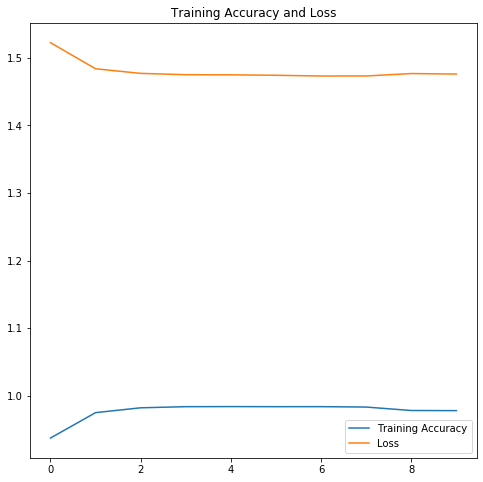

In [10]:
acc = history.history['acc']
loss=history.history['loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, loss, label='Loss')
plt.legend(loc='lower right')
plt.title('Training Accuracy and Loss')


## Test Image

Prediction of model: 2


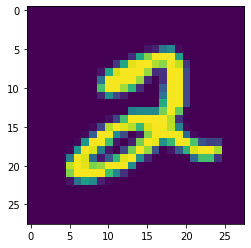

In [14]:
image = (train_images[5]).reshape(1,28,28,1)
model_pred = model.predict_classes(image, verbose=0)
plt.imshow(image.reshape(28,28))
print('Prediction of model: {}'.format(model_pred[0]))

Prediction of model: 1


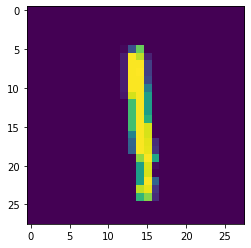

In [15]:
image = (train_images[8]).reshape(1,28,28,1)
model_pred = model.predict_classes(image, verbose=0)
plt.imshow(image.reshape(28,28))
print('Prediction of model: {}'.format(model_pred[0]))

## Test Multiple Image

Test images array shape: (4, 28, 28)
Predicted digit: 2
Predicted digit: 1
Predicted digit: 0
Predicted digit: 4


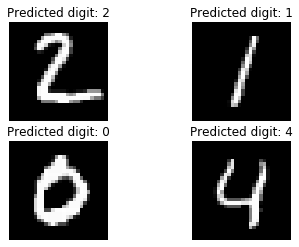

In [16]:

images = test_images[1:5]
images = images.reshape(images.shape[0], 28, 28)
print ("Test images array shape: {}".format(images.shape))


for i, test_image in enumerate(images, start=1):

    org_image = test_image
    test_image = test_image.reshape(1,28,28,1)
    prediction = model.predict_classes(test_image, verbose=0)

    print ("Predicted digit: {}".format(prediction[0]))
    plt.subplot(220+i)
    plt.axis('off')
    plt.title("Predicted digit: {}".format(prediction[0]))
    plt.imshow(org_image, cmap=plt.get_cmap('gray'))

plt.show()


## Save Model

In [20]:
model.save("tf-cnn-model.h5")

## Load Model

In [21]:
loaded_model = models.load_model("tf-cnn-model.h5")

Prediction of model: 3


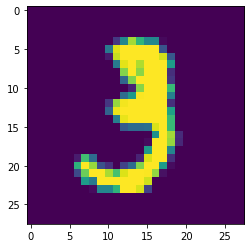

In [25]:
image = (train_images[10]).reshape(1,28,28,1)
model_pred = loaded_model.predict_classes(image, verbose=0)
plt.imshow(image.reshape(28,28))
print('Prediction of model: {}'.format(model_pred[0]))

Prediction of model: 4


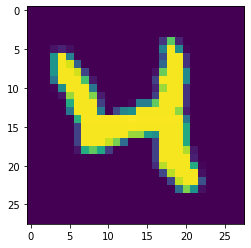

In [24]:
image = (train_images[20]).reshape(1,28,28,1)
model_pred = loaded_model.predict_classes(image, verbose=0)
plt.imshow(image.reshape(28,28))
print('Prediction of model: {}'.format(model_pred[0]))